In [456]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [457]:
df = pd.read_csv('Mobiles Dataset (2025).csv', encoding='latin1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [459]:
df.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [460]:
df.duplicated().sum()

np.int64(15)

In [461]:
df.isna().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [462]:
df.head(1)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024


In [463]:
def commas(text):
    texted = text.split()[1].replace(',','')
    return texted

In [464]:
df['Model Name'].value_counts()

Model Name
Pad 128GB               3
Pad 2 256GB             3
K7 5G 128GB             2
K11x 128GB              2
K11x 256GB              2
                       ..
Pad 5G 128GB            1
Pad 5G 256GB            1
Galaxy Z Fold6 256GB    1
Galaxy Z Fold6 512GB    1
Galaxy Z Fold6 1TB      1
Name: count, Length: 908, dtype: int64

In [465]:
df['Launched Price (Dubai)'] = df['Launched Price (Dubai)'].str.extract(r'([0-9][0-9,]*)')
df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].str.extract(r'([0-9][0-9,]*)$')
df['Launched Price (China)'] = df['Launched Price (China)'].str.extract(r'([0-9][0-9,]*)')
df['Launched Price (India)'] = df['Launched Price (India)'].str.extract(r'([0-9][0-9,]*)')
df['Launched Price (USA)'] = df['Launched Price (USA)'].str.extract(r'([0-9]*)$')
df['Storage'] = df['Model Name'].str.extract(r'([0-9A-Z]*)$')
df['Storage'] = df['Storage'].str.extract(r'^([0-9]+)')
df['RAM'] = df['RAM'].str.extract(r'^([0-9]+)').astype(int)
df['Front Camera'] = df['Front Camera'].str.extract(r'([0-9]+)').astype(int)
df['Back Camera'] = df['Back Camera'].str.extract(r'([0-9]+)').astype(int)
df['Battery Capacity'] = df['Battery Capacity'].str.extract(r'([0-9][0-9,]+)')
df['Screen Size'] = df['Screen Size'].str.extract(r'^([0-9.]+)').astype(float)
df['Mobile Weight'] = df['Mobile Weight'].str.extract(r'([0-9]+)').astype(int)

df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage
0,Apple,iPhone 16 128GB,174,6,12,48,A17 Bionic,"3,600",6.1,"224,999","79,999","5,799",799,"2,799",2024,128
1,Apple,iPhone 16 256GB,174,6,12,48,A17 Bionic,"3,600",6.1,"234,999","84,999","6,099",849,"2,999",2024,256
2,Apple,iPhone 16 512GB,174,6,12,48,A17 Bionic,"3,600",6.1,"244,999","89,999","6,499",899,"3,199",2024,512
3,Apple,iPhone 16 Plus 128GB,203,6,12,48,A17 Bionic,"4,200",6.7,"249,999","89,999","6,199",899,"3,199",2024,128
4,Apple,iPhone 16 Plus 256GB,203,6,12,48,A17 Bionic,"4,200",6.7,"259,999","94,999","6,499",949,"3,399",2024,256


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               930 non-null    object 
 1   Model Name                 930 non-null    object 
 2   Mobile Weight              930 non-null    int64  
 3   RAM                        930 non-null    int64  
 4   Front Camera               930 non-null    int64  
 5   Back Camera                930 non-null    int64  
 6   Processor                  930 non-null    object 
 7   Battery Capacity           930 non-null    object 
 8   Screen Size                930 non-null    float64
 9   Launched Price (Pakistan)  929 non-null    object 
 10  Launched Price (India)     930 non-null    object 
 11  Launched Price (China)     930 non-null    object 
 12  Launched Price (USA)       930 non-null    object 
 13  Launched Price (Dubai)     930 non-null    object 

In [467]:
df[df['Launched Price (Pakistan)'].isna()]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage
929,Samsung,Galaxy Z Fold6 1TB,239,12,10,50,Snapdragon 8 Gen 3,4400,7.6,NaN,"200,999","17,999",259,"8,699",2024,1


In [468]:
modus_storage = df['Storage'].mode()[0]
df['Storage'] = df['Storage'].fillna(modus_storage)

In [469]:
df.dropna(inplace=True)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 928
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               929 non-null    object 
 1   Model Name                 929 non-null    object 
 2   Mobile Weight              929 non-null    int64  
 3   RAM                        929 non-null    int64  
 4   Front Camera               929 non-null    int64  
 5   Back Camera                929 non-null    int64  
 6   Processor                  929 non-null    object 
 7   Battery Capacity           929 non-null    object 
 8   Screen Size                929 non-null    float64
 9   Launched Price (Pakistan)  929 non-null    object 
 10  Launched Price (India)     929 non-null    object 
 11  Launched Price (China)     929 non-null    object 
 12  Launched Price (USA)       929 non-null    object 
 13  Launched Price (Dubai)     929 non-null    object 
 14 

In [471]:
df['Model Name'] = df['Model Name'].str.replace(r'([0-9A-Z]+)$', '', regex=True)
df['Launched Price (China)'] = df['Launched Price (China)'].str.replace(',','').astype(int)
df['Battery Capacity'] = df['Battery Capacity'].str.replace(',','').astype(int)
df['Launched Price (Dubai)'] = df['Launched Price (Dubai)'].str.replace(',','').astype(int)
df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].str.replace(',','').astype(int)
df['Launched Price (India)'] = df['Launched Price (India)'].str.replace(',','').astype(int)
df['Launched Price (USA)'] = df['Launched Price (USA)'].astype(int)
df['Storage'] = df['Storage'].astype(int)
df['GPI'] = (df['Launched Price (USA)'] + df['Launched Price (Pakistan)'] + df['Launched Price (Dubai)'] + df['Launched Price (China)'] + df['Launched Price (India)']) / 1000
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI
0,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395
1,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945
2,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595
3,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295
4,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845


In [472]:
df.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,228.251884,7.779333,18.162540,46.758881,5026.837460,7.083240,125436.063509,50414.899892,3806.168999,422.613563,2176.920344,2022.191604,186.525296,182.256666
std,105.488473,3.180586,11.995709,31.088618,1356.122494,1.534422,101593.522572,40683.357655,2728.111642,266.223902,1551.790984,1.862138,126.754258,143.607078
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,15999.000000,5999.000000,499.000000,0.000000,299.000000,2014.000000,1.000000,22.875000
25%,185.000000,6.000000,8.000000,16.000000,4410.000000,6.500000,54999.000000,19999.000000,1699.000000,199.000000,1000.000000,2021.000000,128.000000,76.945000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,85000.000000,34999.000000,2800.000000,349.000000,1675.000000,2023.000000,128.000000,127.095000
75%,208.000000,8.000000,32.000000,50.000000,5100.000000,6.780000,179999.000000,74900.000000,5499.000000,599.000000,3199.000000,2024.000000,256.000000,261.295000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,604999.000000,274999.000000,17999.000000,1719.000000,11099.000000,2025.000000,512.000000,792.095000


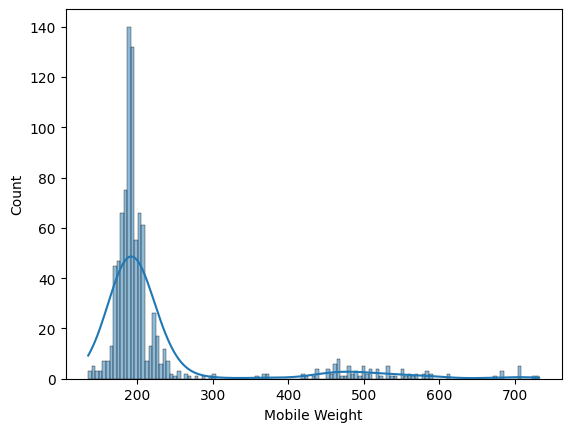

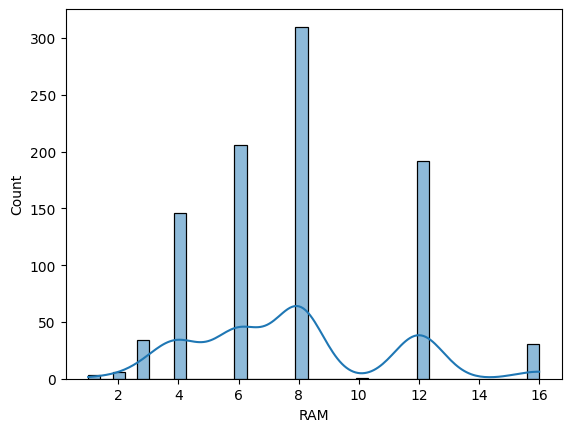

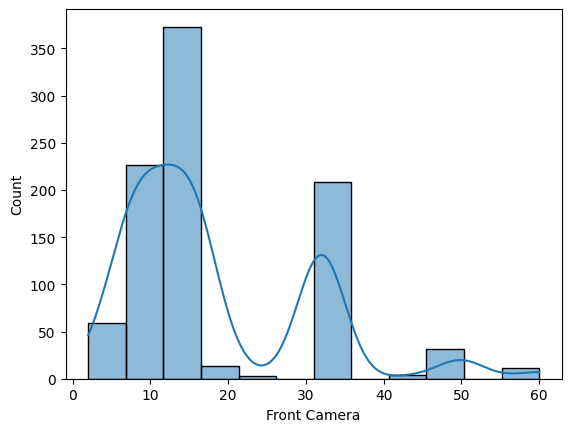

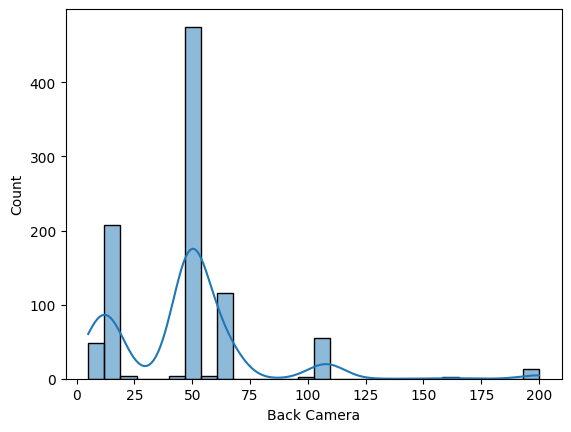

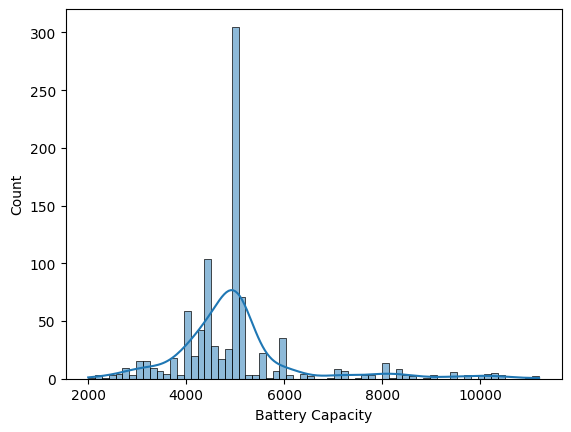

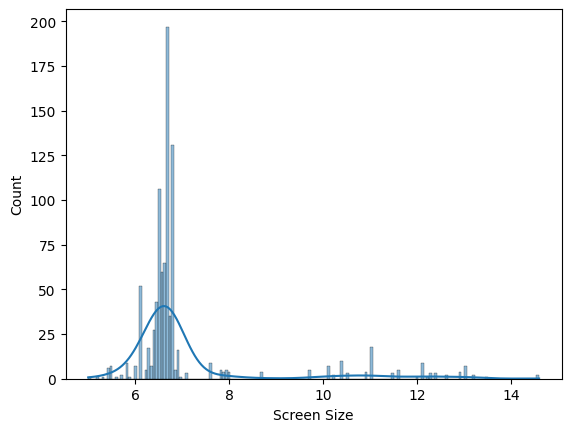

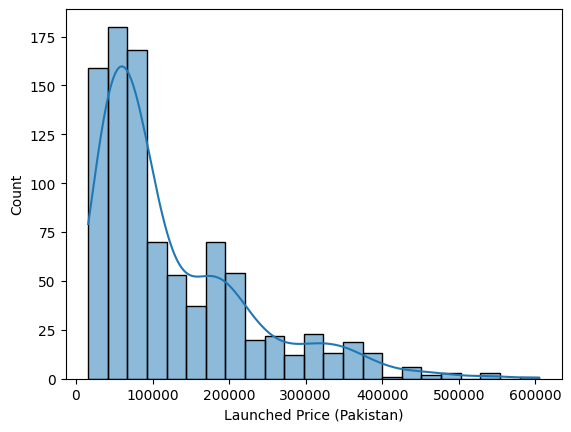

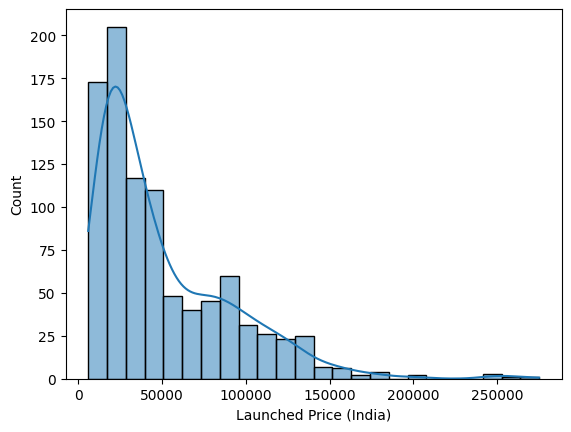

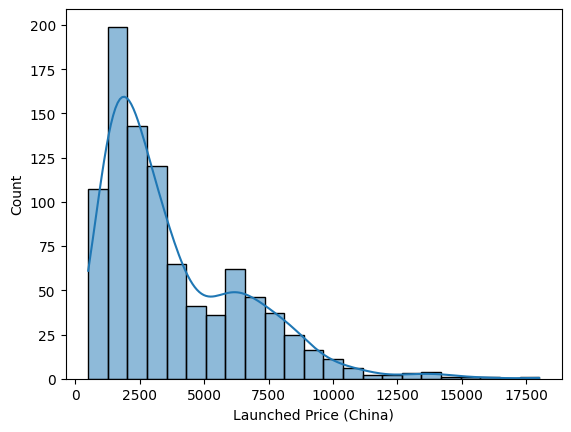

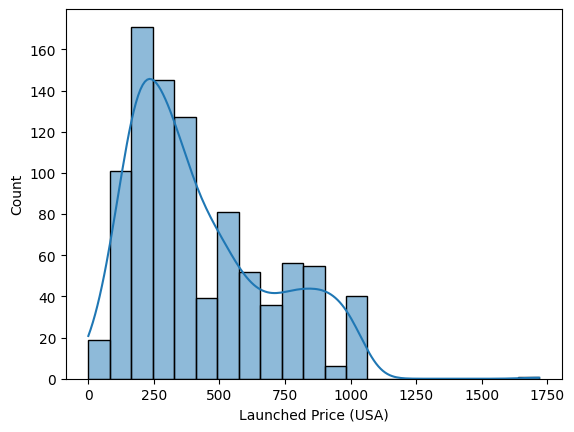

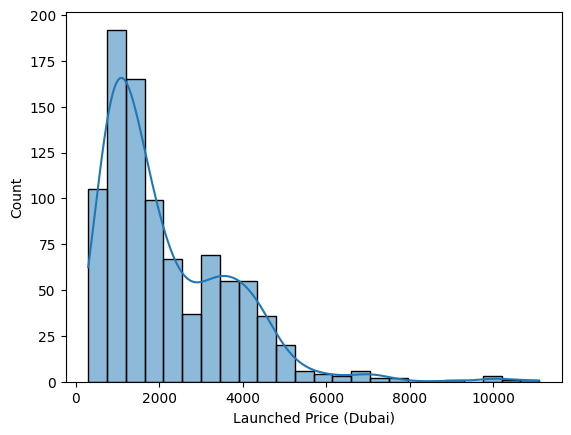

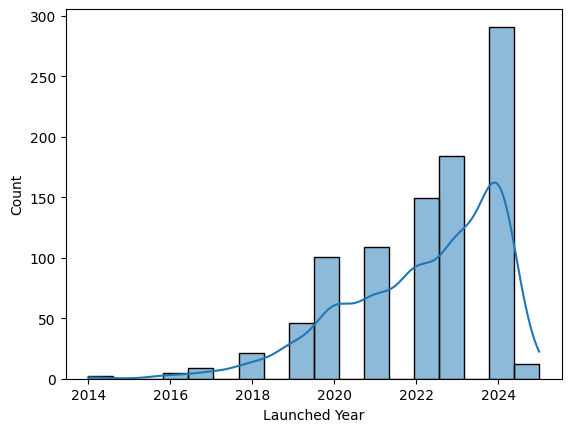

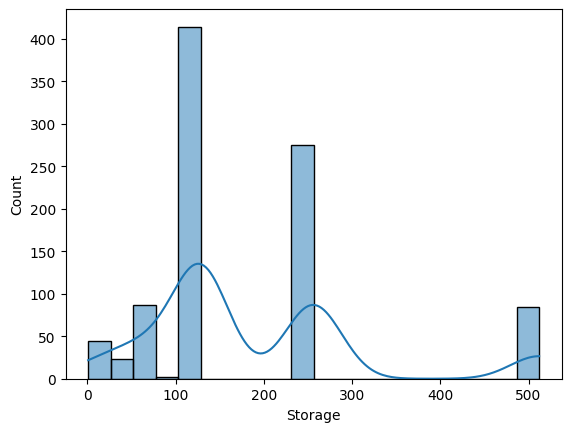

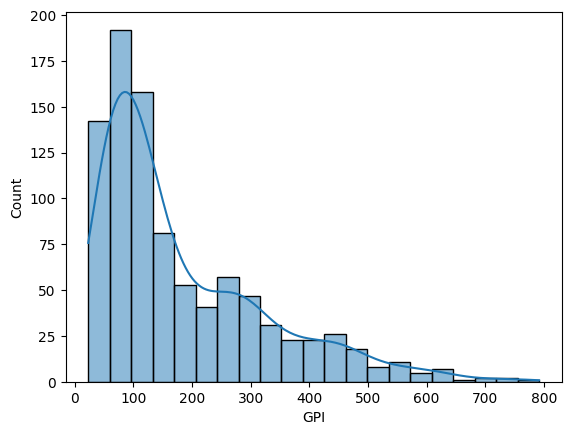

In [473]:
for i in df.select_dtypes('number'):
    sns.histplot(df[i],kde=True)
    plt.show()

In [474]:
brand_gpi = df.groupby('Company Name')['GPI'].agg(['mean','median','std','min','max','count']).sort_values(by='mean',ascending=True)
brand_gpi

,mean,median,std,min,max,count
Company Name,,,,,,
Infinix,63.947321,53.0200,31.330831,22.875,146.045,56
Nokia,67.567364,63.2950,18.945760,44.865,105.935,11
POCO,84.534000,77.3350,36.253483,37.745,161.045,30
Lenovo,91.981000,53.8450,73.386142,29.195,247.095,15
Poco,97.272000,97.2720,5.154808,93.627,100.917,2
Realme,98.537739,86.1280,38.284029,46.528,221.938,69
Vivo,113.129174,88.1405,84.263129,31.145,413.495,86
Tecno,124.912436,88.8250,107.456657,29.985,590.795,39
iQOO,129.261667,129.3950,16.850396,112.345,146.045,3


unincluded brand: iqoo, sony, nokia, lenovo

In [475]:
df['Company Name'] = df['Company Name'].replace('Poco','POCO')

In [476]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI
0,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395
1,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945
2,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595
3,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295
4,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845


In [477]:
for i in ['iQOO','Sony','Nokia','Lenovo']:
    print(i)
    df =  df[df['Company Name'] != i]
    
df['Company Name'].value_counts().sort_values()

iQOO
Sony
Nokia
Lenovo


Company Name
Google       21
Xiaomi       27
POCO         32
Tecno        39
Huawei       42
OnePlus      53
Infinix      56
Motorola     62
Realme       69
Vivo         86
Samsung      87
Honor        91
Apple        97
Oppo        129
Name: count, dtype: int64

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 928
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               891 non-null    object 
 1   Model Name                 891 non-null    object 
 2   Mobile Weight              891 non-null    int64  
 3   RAM                        891 non-null    int64  
 4   Front Camera               891 non-null    int64  
 5   Back Camera                891 non-null    int64  
 6   Processor                  891 non-null    object 
 7   Battery Capacity           891 non-null    int64  
 8   Screen Size                891 non-null    float64
 9   Launched Price (Pakistan)  891 non-null    int64  
 10  Launched Price (India)     891 non-null    int64  
 11  Launched Price (China)     891 non-null    int64  
 12  Launched Price (USA)       891 non-null    int64  
 13  Launched Price (Dubai)     891 non-null    int64  
 14 

In [479]:
dfm = df.drop(columns=['Model Name','Processor'])
dfm.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI
0,Apple,174,6,12,48,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395
1,Apple,174,6,12,48,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945
2,Apple,174,6,12,48,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595
3,Apple,203,6,12,48,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295
4,Apple,203,6,12,48,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845


In [480]:
df['Company Name'].value_counts()

Company Name
Oppo        129
Apple        97
Honor        91
Samsung      87
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         32
Xiaomi       27
Google       21
Name: count, dtype: int64

In [481]:
brand_gpi = df.groupby('Company Name')['GPI'].agg(['mean','median','std','min','max','count']).sort_values(by='mean',ascending=True)
brand_gpi

,mean,median,std,min,max,count
Company Name,,,,,,
Infinix,63.947321,53.0200,31.330831,22.875,146.045,56
POCO,85.330125,81.7200,35.216353,37.745,161.045,32
Realme,98.537739,86.1280,38.284029,46.528,221.938,69
Vivo,113.129174,88.1405,84.263129,31.145,413.495,86
Tecno,124.912436,88.8250,107.456657,29.985,590.795,39
Motorola,129.948597,106.3200,88.507171,36.695,434.995,62
Oppo,144.456031,124.0450,82.518225,30.726,475.595,129
Honor,175.070055,124.1950,132.304838,41.195,568.895,91
OnePlus,187.540509,196.5950,85.206702,44.975,386.395,53


In [482]:
brand_gpi.head(3).index

Index(['Infinix', 'POCO', 'Realme'], dtype='object', name='Company Name')

In [483]:
df['Brand_Class'] = df['Company Name'].apply(lambda x: 0 if x in brand_gpi.head(3).index else (2 if x in brand_gpi.tail(4).index else 1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 928
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               891 non-null    object 
 1   Model Name                 891 non-null    object 
 2   Mobile Weight              891 non-null    int64  
 3   RAM                        891 non-null    int64  
 4   Front Camera               891 non-null    int64  
 5   Back Camera                891 non-null    int64  
 6   Processor                  891 non-null    object 
 7   Battery Capacity           891 non-null    int64  
 8   Screen Size                891 non-null    float64
 9   Launched Price (Pakistan)  891 non-null    int64  
 10  Launched Price (India)     891 non-null    int64  
 11  Launched Price (China)     891 non-null    int64  
 12  Launched Price (USA)       891 non-null    int64  
 13  Launched Price (Dubai)     891 non-null    int64  
 14 

In [484]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI,Brand_Class
0,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395,2
1,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945,2
2,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595,2
3,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295,2
4,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845,2


In [485]:
model_gpi = df.groupby('Model Name')['GPI'].agg(['mean','median','max','min','sum','count'])
model_gpi

,mean,median,max,min,sum,count
Model Name,,,,,,
,139.868353,133.295,266.684,72.565,2377.762,17
10X Lite,51.575000,51.575,51.575,51.575,51.575,1
13 5G,75.108000,75.108,78.698,71.518,150.216,2
13 Pro 5G,110.213000,110.213,113.858,106.568,220.426,2
13 Pro+ 5G,138.123000,138.123,141.768,134.478,276.246,2
...,...,...,...,...,...,...
iPhone X,283.035000,283.035,297.985,268.085,566.070,2
iPhone XR,248.912667,245.596,276.496,224.646,746.738,3
iPhone XS,364.485000,364.085,395.385,333.985,1093.455,3


In [486]:
model_gpi.index

Index(['', '10X Lite', '13 5G ', '13 Pro 5G ', '13 Pro+ 5G ', '13+ 5G ',
       '14 Pro 5G ', '14 Pro+ 5G ', '14x 5G ', '30 Pro',
       ...
       'iPhone 15 Pro Max ', 'iPhone 16 ', 'iPhone 16 Plus ', 'iPhone 16 Pro ',
       'iPhone 16 Pro Max ', 'iPhone X ', 'iPhone XR ', 'iPhone XS ',
       'iPhone XS Max ', 'iQOO 12 '],
      dtype='object', name='Model Name', length=576)

In [487]:
df[df['Model Name'] == '']

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI,Brand_Class
626,Huawei,,181,8,13,50,Snapdragon 888 4G,4100,6.50,129999,59999,4488,699,2599,2021,128,197.784,2
633,Huawei,,181,8,13,50,Snapdragon 778G 4G,4100,6.50,119999,54999,4088,649,2399,2022,128,182.134,2
640,Huawei,,197,8,13,48,Snapdragon 8+ Gen 1 4G,4815,6.67,169999,84999,6988,999,3699,2023,128,266.684,2
805,Honor,,185,8,32,40,Kirin 985 5G,4000,6.53,74999,29999,2999,449,1599,2020,30,110.045,1
808,Honor,,190,6,16,64,Kirin 820 5G,4000,6.50,54999,22999,2299,349,1299,2020,30,81.945,1
809,Honor,,203,6,16,40,Kirin 820 5G,4300,6.63,48999,19999,2099,319,1149,2020,128,72.565,1
814,Honor,,189,8,16,50,MediaTek Dimensity 1000+,4000,6.72,89999,37999,3999,599,2199,2021,128,134.795,1
815,Honor,,175,8,32,108,Qualcomm Snapdragon 778G,4300,6.57,89999,37999,2699,549,2049,2021,50,133.295,1
818,Honor,,192,6,16,64,MediaTek Dimensity 900,4300,6.67,64999,25999,2299,379,1399,2021,128,95.075,1
825,Honor,,179,8,32,108,Qualcomm Snapdragon 778G,4800,6.67,99999,41999,2699,549,2049,2021,60,147.295,1


In [488]:
df.drop(columns=['Model Name','Processor'],inplace=True)
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI,Brand_Class
0,Apple,174,6,12,48,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395,2
1,Apple,174,6,12,48,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945,2
2,Apple,174,6,12,48,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595,2
3,Apple,203,6,12,48,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295,2
4,Apple,203,6,12,48,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845,2


In [489]:
brand_gpi.index

Index(['Infinix', 'POCO', 'Realme', 'Vivo', 'Tecno', 'Motorola', 'Oppo',
       'Honor', 'OnePlus', 'Xiaomi', 'Google', 'Samsung', 'Huawei', 'Apple'],
      dtype='object', name='Company Name')

In [492]:
mapping = {}
dicto = []
for idx, label in enumerate(brand_gpi.index):
    mapping[label] = idx

{'Infinix': 0}
{'Infinix': 0, 'POCO': 1}
{'Infinix': 0, 'POCO': 1, 'Realme': 2}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6, 'Honor': 7}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6, 'Honor': 7, 'OnePlus': 8}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6, 'Honor': 7, 'OnePlus': 8, 'Xiaomi': 9}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6, 'Honor': 7, 'OnePlus': 8, 'Xiaomi': 9, 'Google': 10}
{'Infinix': 0, 'POCO': 1, 'Realme': 2, 'Vivo': 3, 'Tecno': 4, 'Motorola': 5, 'Oppo': 6, 'Honor': 7, 'OnePlus': 8, 'Xiaomi': 9, 'Google': 10, 'Samsung': 11}
{'Inf

In [493]:
df['Company Name'] = df['Company Name'].map(mapping)

In [495]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Storage,GPI,Brand_Class
0,13,174,6,12,48,3600,6.1,224999,79999,5799,799,2799,2024,128,314.395,2
1,13,174,6,12,48,3600,6.1,234999,84999,6099,849,2999,2024,256,329.945,2
2,13,174,6,12,48,3600,6.1,244999,89999,6499,899,3199,2024,512,345.595,2
3,13,203,6,12,48,4200,6.7,249999,89999,6199,899,3199,2024,128,350.295,2
4,13,203,6,12,48,4200,6.7,259999,94999,6499,949,3399,2024,256,365.845,2


In [496]:
df['Company Name']

0      13
1      13
2      13
3      13
4      13
       ..
924     1
925     1
926     1
927    11
928    11
Name: Company Name, Length: 891, dtype: int64

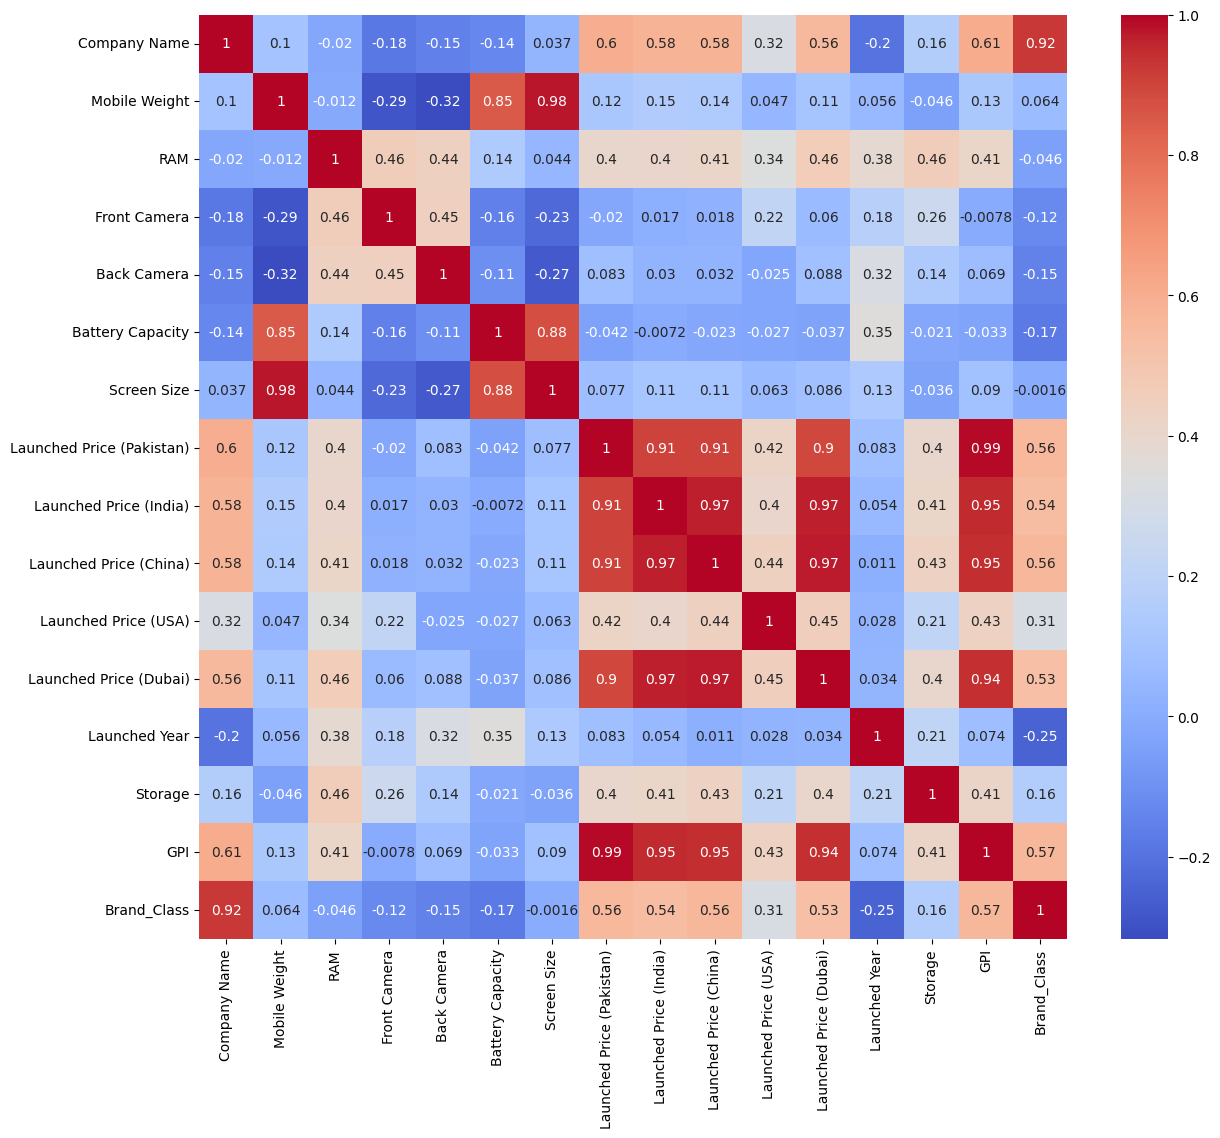

In [497]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()